<a href="https://colab.research.google.com/github/claudinez/educ360_DataViz_Paciente/blob/main/Pacientes_Clinica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Pacientes de uma Clínica**
```
# ==========================
# Análise de Pacientes de uma Clínica
# ==========================

# Objetivo:
# 1. Ler o arquivo 'pacientes_clinica.csv'.
# 2. Tratar valores nulos de forma lógica (Idade, Peso, Pressão, Glicose, Gênero).
# 3. Gerar 3 gráficos usando matplotlib:
#    - Barras: Média de glicose por faixa etária
#    - Pizza: Proporção de pacientes por gênero
#    - Linhas: Evolução média da pressão arterial por mês
```



# **SEÇÃO 1 — IMPORTAÇÃO DAS BIBLIOTECAS**

In [2]:
# Nesta etapa importamos as bibliotecas que serão utilizadas para:
# - Manipulação e análise de dados: pandas, numpy
# - Criação de gráficos: matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ** SEÇÃO 2 — CRIAÇÃO DO ARQUIVO 'pacientes_clinica.csv'**

In [12]:
# Agora lemos o arquivo e visualizamos as 5 primeiras linhas
# para entender a estrutura e os tipos de dados.
df = pd.read_csv("https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/pacientes.csv")

# Visualização inicial dos dados
#display("📋 Prévia do dataset:")
#display(df.head())

# Exibir informações básicas e valores nulos
#display("\n🔍 Informações gerais:")
#display(df.info())

display("\n🩺 Valores nulos por coluna:")
display(df.isnull().sum())

'\n🩺 Valores nulos por coluna:'

,0
ID,0
Nome,0
Idade,0
Genero,0
Peso,0
Glicose,8
Pressao,5
Mes,0


# **SEÇÃO 3 — TRATAMENTO DE VALORES NULOS**

In [13]:
# Estratégia de tratamento:
# - Colunas numéricas → substituímos valores ausentes pela média.
# - Coluna 'Genero' → substituímos pelo valor mais frequente (moda)
# ============================================================

# Campos com valores nulos:
# • Glicose: 8 valores ausentes
# • Pressao: 5 valores ausentes
# Preenchendo valores nulos com a média de cada coluna
df['Glicose'] = df['Glicose'].fillna(df['Glicose'].mean())
df['Pressao'] = df['Pressao'].fillna(df['Pressao'].mean())

# Confirmação do tratamento
display("✅ Valores nulos tratados com sucesso!\n")
display(df.isnull().sum())

'✅ Valores nulos tratados com sucesso!\n'

,0
ID,0
Nome,0
Idade,0
Genero,0
Peso,0
Glicose,0
Pressao,0
Mes,0


 SEÇÃO 4 — GRÁFICO DE BARRAS: MÉDIA DE GLICOSE POR FAIXA ETÁRIA

# ** SEÇÃO 4 — GRÁFICO DE BARRAS: MÉDIA DE GLICOSE POR FAIXA ETÁRIA**

📈 Média de Glicose por Faixa Etária (nova divisão):


,Glicose
Faixa_Etaria,
0–30,86.400000
31–40,93.958710
41–50,101.393888
51–60,108.096774
61+,109.580645


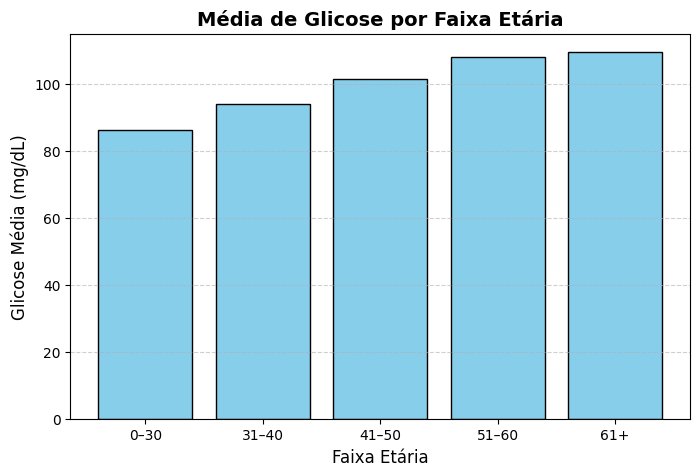

In [17]:
# Objetivo:
# - Criar faixas etárias (0–19, 20–39, 40–59, 60+)
# - Calcular a glicose média de cada faixa
# - Gerar gráfico de barras com matplotlib
# ============================================================

# Criando faixas etárias personalizadas
bins = [0, 30, 40, 50, 60, 120]
labels = ['0–30', '31–40', '41–50', '51–60', '61+']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=True)

# Calculando média de glicose por faixa etária
glicose_media = df.groupby('Faixa_Etaria', observed=False)['Glicose'].mean()

# Exibindo resultado
print("📈 Média de Glicose por Faixa Etária (nova divisão):")
display(glicose_media)

# Plotando gráfico
plt.figure(figsize=(8,5))
plt.bar(glicose_media.index, glicose_media.values, color='skyblue', edgecolor='black')
plt.title("Média de Glicose por Faixa Etária", fontsize=14, weight='bold')
plt.xlabel("Faixa Etária", fontsize=12)
plt.ylabel("Glicose Média (mg/dL)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# **SEÇÃO 5 — GRÁFICO DE PIZZA: PROPORÇÃO DE PACIENTES POR GÊNERO**

📊 Contagem de pacientes por gênero:


,count
Genero,
M,37
F,33


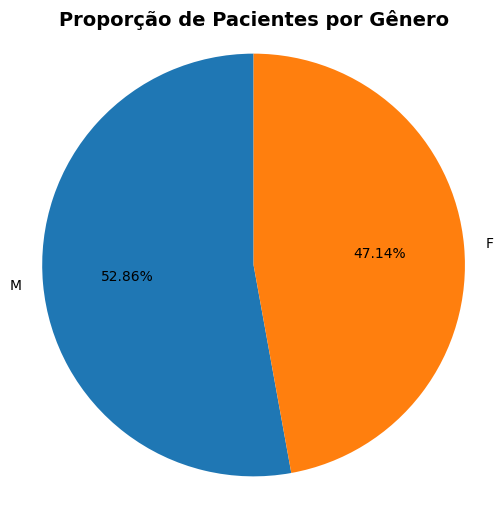

In [21]:
# Objetivo:
# - Visualizar a distribuição de pacientes por gênero
# - Cada fatia representa a proporção de pacientes masculinos e femininos
# ============================================================

# Contagem de pacientes por gênero
genero_counts = df['Genero'].value_counts()

# Exibindo a contagem
print("📊 Contagem de pacientes por gênero:")
display(genero_counts)

# Plotando gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.2f%%', startangle=90, colors=['#1f77b4','#ff7f0e'])
plt.title("Proporção de Pacientes por Gênero", fontsize=14, weight='bold')
plt.axis('equal')  # Mantém o círculo redondo
plt.show()

# **SEÇÃO 6 — GRÁFICO DE LINHA: EVOLUÇÃO MÉDIA DA PRESSÃO ARTERIAL POR MÊS**

'📊 Pressão Arterial Média por Mês:'

,Pressao
Mes,
Abr,129.166667
Ago,131.500000
Dez,132.115385
Fev,129.666667
Jan,126.166667
Jul,128.666667
Jun,132.320513
Mai,131.910256
Mar,133.000000


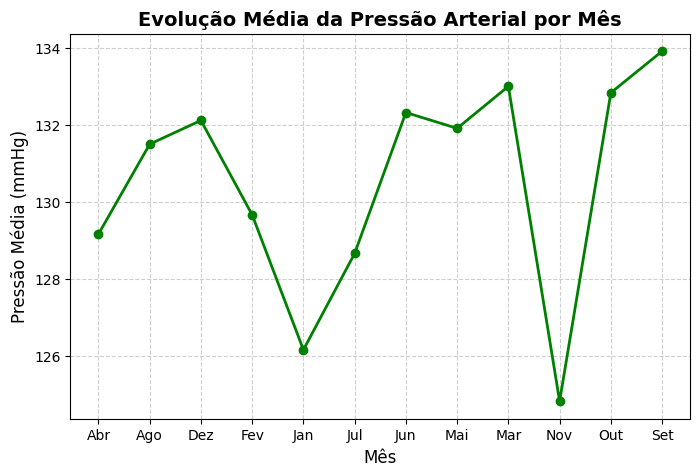

In [20]:
# Objetivo:
# - Agrupar pacientes por mês
# - Calcular a pressão arterial média de cada mês
# - Plotar linha mostrando evolução ao longo do ano
# ============================================================

# Calculando média da pressão por mês
pressao_media_mes = df.groupby('Mes', observed=False)['Pressao'].mean()

# Exibindo o resultado
display("📊 Pressão Arterial Média por Mês:")
display(pressao_media_mes)

# Plotando gráfico de linha
plt.figure(figsize=(8,5))
plt.plot(pressao_media_mes.index, pressao_media_mes.values, marker='o', linestyle='-', color='green', linewidth=2)
plt.title("Evolução Média da Pressão Arterial por Mês", fontsize=14, weight='bold')
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Pressão Média (mmHg)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(pressao_media_mes.index)  # Garantir que todos os meses apareçam
plt.show()